In [7]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
# open the dataset
ds = xr.open_dataset('/Users/rpa/Downloads/nodc_6901147_prof.nc')
# calculate the mean pressure across all profiles.
# we will use this as our vertical coordinate.
# (This is not a perfect solution, but it's good enough for us here.)
ds['pres_mean'] = ds.pres.mean(dim='n_prof')
# swap and rename dimensions for easier plotting
ds = ds.swap_dims({'n_prof': 'juld', 'n_levels': 'pres_mean'}).rename({'juld': 'time'})
ds

<xarray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 0, n_param: 3, pres_mean: 54, time: 162)
Coordinates:
  * time                          (time) datetime64[ns] 2013-05-14T04:05:19.017600 ...
  * pres_mean                     (pres_mean) float64 44.35 30.05 35.1 40.08 ...
Dimensions without coordinates: n_calib, n_history, n_param
Data variables:
    data_type                     object b'Argo profile    '
    format_version                object b'3.1 '
    handbook_version              object b'1.2 '
    reference_date_time           object b'19500101000000'
    date_creation                 object b'20130520055359'
    date_update                   object b'20171020134709'
    platform_number               (time) object b'6901147 ' b'6901147 ' ...
    project_name                  (time) object b'Argo UK                                                         ' ...
    pi_name                       (time) object b'Jon Turton                                   

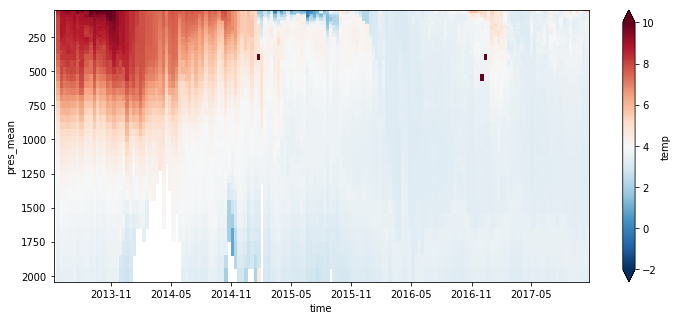

In [43]:
plt.figure(figsize=(12,5))
ds.temp.transpose().plot(vmin=-2, vmax=10, yincrease=False, cmap='RdBu_r')